https://towardsdatascience.com/introduction-to-natural-language-processing-for-text-df845750fb63

NLP concerned with interactions between computer and human (natural) Languages. NLP is used to apply machine learning algorithms to text and speech. 
NLP is used for speech reconization, machine translation, spam detectation, etc

# The Basics of NLP for Text
1. Sentence Tokenization
2. Word Tolenization
3. Text Lemmatization and Stemming
4. Stop Word
5. Regex 
6. Bag-of-words
7. TF-IDF

In [2]:
import nltk

## 1. Sentence Tokenization

To apply a sentence tokenization with NLTK we can use the nltk.sent_tokenize function.

In [3]:
text ="Backgammon is one of the oldest known board games. Its history can be traced back nearly 5,000 years to archeological discoveries in the Middle East. It is a two player game where each player has fifteen checkers which move between twenty-four points according to the roll of two dice."
sentences = nltk.sent_tokenize(text)
print(sentences)

['Backgammon is one of the oldest known board games.', 'Its history can be traced back nearly 5,000 years to archeological discoveries in the Middle East.', 'It is a two player game where each player has fifteen checkers which move between twenty-four points according to the roll of two dice.']


In [4]:
text

'Backgammon is one of the oldest known board games. Its history can be traced back nearly 5,000 years to archeological discoveries in the Middle East. It is a two player game where each player has fifteen checkers which move between twenty-four points according to the roll of two dice.'

Sentence tokenization (also called as sentence segmintation) is the problem of dividing a string of written languages into its component sentences.  

## AS an output, we get the 3 component sentences seperately.

In [5]:
for sentence in sentences:
    print(sentence)
    print()

Backgammon is one of the oldest known board games.

Its history can be traced back nearly 5,000 years to archeological discoveries in the Middle East.

It is a two player game where each player has fifteen checkers which move between twenty-four points according to the roll of two dice.



## 2. Word Tokenization

Word tokenization (also called as word segmentation) is the problem of dividing string of written languages in to its component words. 
i use the nltk.word_tokenize function


In [6]:
for sentence in sentences:
    words = nltk.word_tokenize(sentence)
    print(words)
    print()

['Backgammon', 'is', 'one', 'of', 'the', 'oldest', 'known', 'board', 'games', '.']

['Its', 'history', 'can', 'be', 'traced', 'back', 'nearly', '5,000', 'years', 'to', 'archeological', 'discoveries', 'in', 'the', 'Middle', 'East', '.']

['It', 'is', 'a', 'two', 'player', 'game', 'where', 'each', 'player', 'has', 'fifteen', 'checkers', 'which', 'move', 'between', 'twenty-four', 'points', 'according', 'to', 'the', 'roll', 'of', 'two', 'dice', '.']



## 3. Text Lammatization and Stemming
1. The goal of the both stemming and Lammatization is to reduce inflectional forms and sometimes derivationally related forms of a word to a common base form.
Exampels am,is, are --> be
dog, dogs,dog's,dogs' ==> dog

2. Stemming and Lammatization are special cases if normalization. However they are different from each other.

3. Stemming usually refers to a crude heuristic process that chops off the ends of words in the hope of achieving this goal correctly most of the time and often includes the removal of dericational affixes.

4. Lemmatization usually refers to doing properly with the use of a vocabulary and morphological analysis of words, normally aming to remove inflectional endings only and to return the base or dictionaly form of word, which is known as lemma.

5. Examples
  1. The word "better" has good as its lemma. This link is missed by stemming, as it requires a dictionary look-up.
  2. The word "play" is the base form for the word "playing", and hence this is matched in both stemming and lemmatization.
  3. The word "metting" can be either the base form of noun or a form of verb ("to meet") depending upon the context. 

In [7]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import wordnet

print("Print the results of stemmed and lemmitization using the passed stemmer and lemmatixer, word and part of speech (pos)")
print("")
def compare_stemmer_and_lammatizer(stemmer, lemmatizer, word,pos):
    print("Stemmer:", stemmer.stem(word))
    print("Lemmatizer:", lemmatizer.lemmatize(word,pos))
    print()

lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

compare_stemmer_and_lammatizer(stemmer, lemmatizer, word = "seen", pos = wordnet.VERB)
compare_stemmer_and_lammatizer(stemmer, lemmatizer, word = "drove", pos = wordnet.VERB)

Print the results of stemmed and lemmitization using the passed stemmer and lemmatixer, word and part of speech (pos)

Stemmer: seen
Lemmatizer: see

Stemmer: drove
Lemmatizer: drive



## 4. Stop Words

1. Stop words are the words which are filtered out before and after processing of text. 
2. When applying ML to text, these words can added a lot of noise. Thats why we want to remove these irrelevant words. 

3. Stop word usually refer to the most common words such as "and", "the", "a" in a language, but there is no universal list if stopwords. The list of the stop words can change dependign on applications. 

In [8]:
from nltk.corpus import stopwords
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [9]:
print(sentence)

It is a two player game where each player has fifteen checkers which move between twenty-four points according to the roll of two dice.


## now I want to remove the stop words from the sentence

In [10]:
stop_words = set(stopwords.words("english"))

wwords = nltk.word_tokenize(sentence)
without_stop_words = [word for word in wwords if not word in stop_words]
print(without_stop_words)

['It', 'two', 'player', 'game', 'player', 'fifteen', 'checkers', 'move', 'twenty-four', 'points', 'according', 'roll', 'two', 'dice', '.']


### USE stop words with list comprehesion

In [11]:
stop_words = set(stopwords.words("english"))

wwords = nltk.word_tokenize(sentence)
without_stop_words = []
for word in wwords:
    if word not in stop_words:
        without_stop_words.append(word)

print(without_stop_words)

['It', 'two', 'player', 'game', 'player', 'fifteen', 'checkers', 'move', 'twenty-four', 'points', 'according', 'roll', 'two', 'dice', '.']


## Why we are converting Lists in to sets???
## LISTS ==> Sets

1. Set is an abstract data type that can store unique values, without any particular order. The search operation in set is much faster than the serch operation in a list. 

# 5. Regex ==> Regular Expression -- define a search pattern

### Regex or Regexp is a sequence of characters that define a search pattern. 
1. .  - match ay character except newline
2. \w - match word
3. \d - match digit
4. \s - match whitespace
5. \W - match not word
6. \D - match not digit
7. \S - match not whitespace
8. [abc] - match any of a, b, or c
9. [^abc] - not match a, b, or c
10. [a-g] - match a character between a & g

1. We can use regex to apply additional filtering to our text. For example, we can remove all the non-words charater.
2. In python, "re" module provides regular expression matching operations simillar to those in perl. 
3. We can use "re.sub" function to replace the matches for a pattern with a replacement string. 


In [13]:
import re

new_sentence = "The development of snowboarding was inspired by skateboarding, sledding, surfing and skiing."

pattern = r"[^\w]"
print(re.sub(pattern, " ", new_sentence))
print()
print(new_sentence)

The development of snowboarding was inspired by skateboarding  sledding  surfing and skiing 

The development of snowboarding was inspired by skateboarding, sledding, surfing and skiing.


In [17]:
pattern = r"[^\w]"
print(re.sub(pattern,',', new_sentence))

The,development,of,snowboarding,was,inspired,by,skateboarding,,sledding,,surfing,and,skiing,


In [21]:
pattern = r"[a-k]"
print(re.sub(pattern,' ', new_sentence))

T     v lopm nt o  snow o r  n  w s  nsp r    y s  t  o r  n , sl    n , sur  n   n  s   n .


In [22]:
pattern = r"[abc]"
print(re.sub(pattern, " ", new_sentence))

The development of snow o rding w s inspired  y sk te o rding, sledding, surfing  nd skiing.


In [23]:
pattern = r"[^abc]"
print(re.sub(pattern, " ", new_sentence))

                       b a       a           b    a  b a                         a          


# Word embedding: How to transfrom text in to numbers 

continue from above ...........

Basically everything is counting the numbers, and tehre are diffent way to do it, here are some examples, 

1. bag-of word --> not sequencial, only in 0 or 1
2. TF-IDF      --> more scientific
3. Word2Vec
4. Sent2Vec
5. Doc2Vec

look below

# 6. Bag-of-words
## Feature extraction -- convert text in to vector of numbers
- Machine Learning algorithms cannot work with raw text directly, we need to convert the text into vector of numbers. This is called as features extraction.
- The bag-of-words model is popular and simple feature extraction techniques used when we work with text. It describe the occurace of each word with in a document. 
  1. Design a vocabulary of known words (also called as tokens)
  2. Choose a measure of the presence of known words

- This model tris trying to understand whether a known word occurs in a document, but dont know where is that word in the document. 

## 6.1 Load the data (hhh.txt data from my folder)

### hhh.txt has 
- I like this movie, it's funny. --> 1st document
- I hate this movie.             --> 2nd document
- This was awesome! I like it.   --> 3rd 
- Nice one. I love it.

# To achieve this we can simply read the file and split it by lines.

In [50]:
with open("hhh.txt", "r") as file:
    documents = file.read().splitlines()

print(documents)

["I like this movie, it's funny.", 'I hate this movie.', 'This was awesome! I like it.', 'Nice one. I love it.']


## 6.2 Design a vocabulary
- We can use the CountVectorizer class from the sklearn to design our volcabulary. We will see how we can us it after reading the next step. 

## 6.3 Create the document vectors

1. We need to score the words in each document. **{< The task here is to convert each raw text into a vector number >} **.

After that, we can use these vectors as input for a ML model. The simplest scoring method is to mark the presence of words with 1 for present and 0 for absence. 

Now, lets see how we can create a bag-of-words model using the mentioned above CountVectorizer class.

In [52]:
# import the libraries we need
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# step 2 Design the Vocabulary
# the default token pattern removes tokens of single character. Thats 
# why we dont have the "I" and "s" tokens in the output

count_vectorizer = CountVectorizer()

# step 3. Create the Bag-of-Words Model
bag_of_words = count_vectorizer.fit_transform(documents)

# show the Bag-of-words model as pandas Dataframe

feature_names = count_vectorizer.get_feature_names()
pd.DataFrame(bag_of_words.toarray(), columns = feature_names)



,awesome,funny,hate,it,like,love,movie,nice,one,this,was
0,0,1,0,1,1,0,1,0,0,1,0
1,0,0,1,0,0,0,1,0,0,1,0
2,1,0,0,1,1,0,0,0,0,1,1
3,0,0,0,1,0,1,0,1,1,0,0


In [53]:
documents

["I like this movie, it's funny.",
 'I hate this movie.',
 'This was awesome! I like it.',
 'Nice one. I love it.']

- 1st row --> 0 index --> like, this, movie, its, funny (tf= 1/5, idf = log(4/2) for movie)
- 2nd row --> 1 index --> hate, this, movie
- 3rd row --> 2 index --> this, was, awesome, like, it 
- 4th row --> 3 index -->  nice,one, love, it

## Designing the Vocabulary

When the vocabulary size increases, the vector representation of the documents also increases. In above example, the length of the document vector is equal to the # of known words.

In some cases, we have huge amount of data and in this cases, the length if the vector that represents a documents might be thousands or millions of elements. Furthermore, each documents mau contain only a few of known words in the vocabulary.

Therefore, the vector representation will have **lots of zeros**. These vectors which have lots of zeros are called as **sparse vectors**. They require more memory and computational resources. 

### the vectors whcih has Lots of zeros is called sparse vectors.  

We can decrease the **number of known words** when using a bag-of-words model to decrease the required memory and computational resources. We can use the **text cleaning techniques** we've already seen in this article before we create our bag-of-words model:

- Ignoring the case of the words
- Ignoring punctuation
- Removing the stop words from our documents
- Reducing the words to their base form (Text Lemmatization and Stemming)
- Fixing misspelled words




Another more complex way to create a vocabulary is to use **grouped words**. This changes the scope of the vocabulary and allows the bag-of-words model to get more details about the document. This approach is called **n-grams**.


## **An n-grams is a sequence of of number of items (words, letter, numbers, digits etc)**.  in the context of text corpora, n-grams typically refer to a sequence of words. 

- unigram --> one word
- bigram  --> sequence of two words
- tigram  --> sequence of three words
- n-grams --> # of grouped words.

## Scoring Words
Once, we have created our vocabulary of known words, we need to score the occurrence of the words in our data. We saw one very simple approach - the binary approach (1 for presence, 0 for absence).
Some additional scoring methods are:
- Counts.-->  Count the number of times each word appears in a document.
- Frequencies. --> Calculate the frequency that each word appears in document out of all the words in the document.

# 7. TF-IDF
## Term Frequency - inverse document frequency

Term frequency- inverse document frequency (TF-IDF) is a **statistical measure** used to evaluate the importance of a word to a document in a collection or corpus. 

One problem with scoring word frequency is that the most frequent words in the document start to have the highest scores. These frequent words may not contain as much “informational gain” to the model compared with some rarer and domain-specific words. One approach to fix that problem is to penalize words that are frequent across all the documents. This approach is called TF-IDF.

- The formula used to calculate a TF-inverse document frequency score for a given tem x within a document y.

- W_(x,y) = tf_(x,y) X log(N/df_x)

- tf_(x,y) --> frequency of x and y
- df_x --> # of documents containing x
- N - total # of documents

### Term Frequency (TF): a scoring of the frequency of the word in the current document.


**TF = [number of times term appears in a documents]/[Total number of items in the documents]**

### Inverse Term Frequency: A scoring of how rare the word is across the documents.

**IDF(term)=log([Total number of documents]/[Number of documents with term in it])**

TF-IDE (term) = TF(term)*IDF(term)


Example
- In python, we can use the tfidfVectorizer class from the sklearn library to calculate the TF-IDF scores for given documents. Lets use the same sentences that we have used with the bag-of-words example.

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

tfidf_vectorizer = TfidfVectorizer()
values = tfidf_vectorizer.fit_transform(documents)

# Show the Model as a pandas DataFrame
feature_names = tfidf_vectorizer.get_feature_names()
pd.DataFrame(values.toarray(), columns = feature_names)

,awesome,funny,hate,it,like,love,movie,nice,one,this,was
0,0.000000,0.571848,0.000000,0.365003,0.450852,0.000000,0.450852,0.000000,0.000000,0.365003,0.000000
1,0.000000,0.000000,0.702035,0.000000,0.000000,0.000000,0.553492,0.000000,0.000000,0.448100,0.000000
2,0.539445,0.000000,0.000000,0.344321,0.425305,0.000000,0.000000,0.000000,0.000000,0.344321,0.539445
3,0.000000,0.000000,0.000000,0.345783,0.000000,0.541736,0.000000,0.541736,0.541736,0.000000,0.000000


In [57]:
documents

["I like this movie, it's funny.",
 'I hate this movie.',
 'This was awesome! I like it.',
 'Nice one. I love it.']

## Summary

1. NLP is used to apply machine learning algorithms to text and speech.
2. NLTK (Natural Language Toolkit) is a leading platform for building Python programs to work with human language data
3. Sentence tokenization is the problem of dividing a string of written language into its component sentences
4. Word tokenization is the problem of dividing a string of written language into its component words
5. The goal of both stemming and lemmatization is to reduce inflectional forms and sometimes derivationally related forms of a word to a common base form.
6. Stop words are words which are filtered out before or after processing of text. They usually refer to the most common words in a language.
7. A regular expression is a sequence of characters that define a search pattern.
8. The bag-of-words model is a popular and simple feature extraction technique used when we work with text. It describes the occurrence of each word within a document.
9. TF-IDF is a statistical measure used to evaluate the importance of a word to a document in a collection or corpus.

https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

### documents (collection of rows) lai Topic (euta sar 1 line ma describe) gar nu lai Topic modeling bhanxa. Summerize the one paragraph in to 1 line is called topic modeling. 

# Topic Modeling in Python: Latent Dirichlet Allocation (LDA) 

### Topic Modeling --> uncovers the hidden structure in texts or documents. 

## Topic Modeling Techniques --> LDA

### LDA ---> [Dimension reduction -- paragraph to topic]

Topic modeling, is a type of statistical language models used for uncovering hidden structure in a collection of texts. In a practical and more intutively, we can do
1. Dimensionality Reduction: - where rather than representing a text T in its feature space as {Word_i: count(Word_i, T) for Word_i in Vocabulary}, you can represent it in a topic space as {Topic_i: Weight(Topic_i, T) for Topic_i in Topics}.

2. Unsupervised Learning: - Where it can be compared to clustering, as in the case of clustering, the number of topics, like the number of clusters, is an output parameter. By doing topic modeling, we build clusters of words rather than clusters of texts. A text is thus a mixture of all the topics, each having a specific weight.

3. Tagging, abstract "topics" that occur in a collection of documents that best represents the information in them.

**There are several algorithms to perform Topic Modelling, one of tehm is Latent Dirichlet Allocation (LDA).**

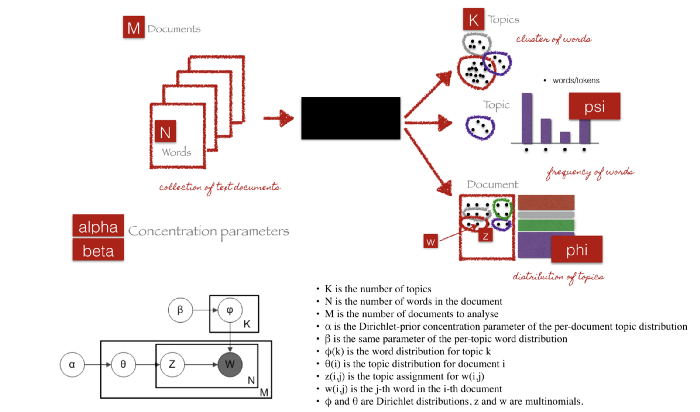

Generative process of LDA:-
    Given M number of Documents, N number of words, and K number of topics, model train to output:
    
    psi, the distribution of words for each topic K
    phi, the distribution of topics for each documents i
    
**Alpha parameter**:- document-topic density
- is a Dirichlet prior concentration parameter that represents **document topic density**. with higher alpha, documents are assumed to made up more topics and results in more specific topic distribution per documents. 

**Beta parameter**: - topic-word density
- is the same prior concenration parameter that represents topic- word denstiy -  with high beta, topics are assumed to made of up most of the words and results in a more specific word distribution per topic. 

# LDA implementation 
1. Loading data
2. Data cleaning
3. Exploratory analysis
4. Preparing data for LDA analysis
5. LDA model training
6. Analyzing LDA model results

## Loading data
For this tutorial, we’ll use the dataset of papers published in NIPS conference. The NIPS conference (Neural Information Processing Systems) is one of the most prestigious yearly events in the machine learning community. The CSV data file contains information on the different NIPS papers that were published from 1987 until 2016 (29 years!). These papers discuss a wide variety of topics in machine learning, from neural networks to optimization methods, and many more.
Let’s start by looking at the content of the file

In [7]:
# importing modulus
import pandas as pd
import os

os.chdir('..')
# Read data in to papers
papers = pd.read_csv('./Users/manishakhanal/python/DS CPP/NLP/papers_LDA.csv')
papers.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


# Data Cleaning
The goal of the Topic Latent Dirichlit Allocation (LDA) to perform topic modeling, we will solely focus on the text data from each paper, and drop other metadata columns.

In [8]:
# remove the columns
papers = papers.drop(columns=['id', 'event_type', 'pdf_name'],
                    axis=1)
papers.head()

,year,title,abstract,paper_text
0,1987,Self-Organization of Associative Database and ...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,1987,A Mean Field Theory of Layer IV of Visual Cort...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,1988,Storing Covariance by the Associative Long-Ter...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1994,Bayesian Query Construction for Neural Network...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1994,"Neural Network Ensembles, Cross Validation, an...",Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [18]:
#papers.describe()

In [17]:
#papers.info()

# Remove punctuation/lower casing
Next, let’s perform a simple preprocessing on the content of **paper_text** column to make them more amenable for analysis, and reliable results. To do that, we’ll use a regular expression to remove any punctuation, and then lowercase the text

In [19]:
# Load the regular expression library
import re

#Remove punctuation
papers['paper_text_processed'] = papers['paper_text'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
papers['paper_text_processed'] = papers['paper_text_processed'].map(lambda x: x.lower())

# PRint out the first rows of papers
papers['paper_text_processed'].head()

0    767\n\nself-organization of associative databa...
1    683\n\na mean field theory of layer iv of visu...
2    394\n\nstoring covariance by the associative\n...
3    bayesian query construction for neural\nnetwor...
4    neural network ensembles cross\nvalidation and...
Name: paper_text_processed, dtype: object

# Exploratory Analysis
To verify whether the preprocessing happened correctly, we’ll make a word cloud using the wordcloud package to get a visual representation of most common words. It is key to understanding the data and ensuring we are on the right track, and if any more preprocessing is necessary before training the model.

In [ ]:
# Import the wordcloud library
#from wordcloud import WordCloud

#Join the different processed titles together
#long_string = ','.join(list(papers['paper_text_processed'].values))
# Create a WordCloud object
#wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
#wordcloud.generate(long_string)
# Visualize the word cloud
#wordcloud.to_image()

# Prepare text for LDA Analysis

Next, lets work to transform the textual data in a format that will serve as as in input for training LDA model. 
1. Start convert the documents into a simple vector representation (Bag-of-words BoW).

## Bag of words & TF-IDF problems

1. Both BOW and TF-IDF approach semantic information is not stored. TF-IDF gives importance to uncommon words.

2. Ther eis high chance of overfitting. 

## To overcome these particular probem we use Word2Vec 
1. In this word2vec model, each word is basically represented as a vector of 32 or more dimension instead if a single number.
2. Here the semantic information and relation between different words is also preserved. 

continue from above ...........
1. bag-of word
2. TF-IDF
3. Word2Vec
4. Sent2Vec
5. Doc2Vec

# Word embeddings 
## (in word embedding there is the concept of Feature Representation)

**How to overcome the lackfactor on BOF and TF-IDF**

### : how to transform text into numbers
https://monkeylearn.com/blog/word-embeddings-transform-text-numbers/

# One hot representation:- 
Suppose I have 20000 words. The key words lets say Man over there. So Man is repeated lets say 200 times. Thus the one hot representation of Man is writeen in the form of index as a matrix, where 1 represents for man and rest are count as 0. 

Man vector representation

 $$ Man [200] = \begin{bmatrix} 0 \\  0 \\ 0 \\ 1 \\ 0 \\ 0 \end{bmatrix}$$
 
 ### Sparse matrix 
 
 ### Cosine Simililirity : - 
 keeping similler words together
 
#### keras; -Embedding layers 
 

**How to write equation in jupyter notebook**

**go to cell => cell type => Markdown**

$\hat h$ 

$ \sigma = \begin{bmatrix)
a & b
c & d
\end{bmatrix}$

np.vstack(a)

$$f'(a) = \lim_{x \to a} \frac{f(x) - f(a)}{x-a}$$

$$\begin{bmatrix} 1 & 2 & 1 \\ 3 & 0 & 1 \\ 0 & 2 & 4 \end{bmatrix}$$

## --> Word2Vec changed the text into vectorization field.

## one-hot encoding: the most straightforward way to encode a word

In NLP we want to make computer programs that understand, generate and more generally speaking, work with human languages. **The challenge is that, we humans, communicate with words and sentences; mean while, computers only understand the numbers.**

For this reason, we have to map those words (st even sentences) to vectors; just a bunch of numbers. But it is not easy to assigning a number to each word. it is much better if that vector of numbers represents the words and information provided. 

**one-hot encoding**: the most straightforward way to encode a word 

you assume you will be encoding a word from a pre-defined and finite set of possible words. In machine learning, this is usually defined as all the words that appear in your training data. You count how many words there are in the vocabulary, say 1500, and establish an order for them from 0 to that size (in this case 1500). Then, you define the vector of the i-th word as all zeros except for a 1 in the position i.

Imagine our entire vocabulary is 3 words: Monkey, Ape and Banana. The vector for Monkey will be [1, 0, 0]. The one for Ape [0, 1, 0]. And yes, you guessed right: the one for Banana [0, 0, 1].

|      | Monkey | Ape | Banana   |
|------|------  |     |      |
|Monkey| 1      |  0  |   0  |
|  Ape | 0      |  1  |   0  |
|Banana| 0      |  0  |   1  |

So simple, and yet it works! Machine learning algorithms are so powerful that they can generate lots of amazing results and applications.

## Goals and evaluation metrics

We want the vectors to better represent the word, -- What that mean? and how we know it is doing well??

There are basically two kinds of ways to know how they are preforms
1. Explicit methods
2. implicit methods

## How are word vectors created?

There are three big families of words vector, 
1. Statistical methods
2. Predictive methods
3. continuous Bag-of-words (CBOW)

## 1.Statistical Methods
Statistical Methods work by creating a co-occurance matrix. ie they set a window size N (this is usually between 2 and 10). Then, they go through all the text and count how many times each pair of two words are together, meaning they are seperated by as many as N words. 

## 2. Predictive methods

Predictive methods work by training a Machine Learning algorithm to make predictions based on the words and their contexts. Then, they use some of the weights that the algorithm learns to represent each word. They are sometimes called neural methods, because they usually use neural networks.

## 3. Continuous Bag-of-methods (CBOW)

The basic idea of CBOW is to set a sliding window of size N. Let say N = 2, then you take a huge amount of text and train a neural network to predict a word inputting the N words at each slide. 

Imagine that you have the text “The monkey is eating a banana”, you will try to predict the word is given that the two previous words are The and monkey and the next two are eating and a. Also, you’ll train to predict eating knowing the four surrounding words are monkey, is, a and banana. And go on with all the text.

And remember, the neural network is a very small one, let’s go over it step by step:

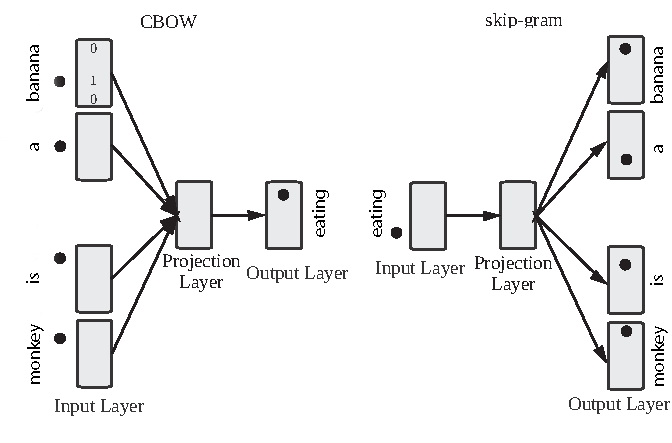

In CBOW we try to predict the word “eating” given the one-hot encoded vectors of it’s context. In skip-gram we try to predict the context given the word “eating”

## Skip gram
Skipgram is just the same as CBOW, but with one big difference: instead of predicting the word in the middle given all the others, you train to predict all the others given the one in the middle.

Yes, knowing just one word it tries to predict four. I’ve been familiar with word2vec for a while now and this idea still blows my mind. It seems absurd, but, hey, it works! And it actually works a little better than CBOW.

# Combine method
As usual, when two methods give good results, you can achieve even better results combining them. In this case that means **training a machine learning model and getting the word vectors from the weights of it, but instead of using a sliding-window to get the contexts, train using the co-occurrence matrix.**

The most important of this combined methods is **GloVe**. They created an algorithm that consists in a very simple machine learning algorithm (a weighted least squares regression) that trains to create vectors that satisfy that if you take the vector of two words i and j and multiply them, the result is similar to the logarithm of the ij entry in the co-occurrence matrix, i.e. the number of co-occurrences for those two words.

They also make some optimizations like adding some weighting to prevent rare co-occurrences to introduce noise and very common ones to skewing the objective too much.

They make explicit and implicit methods for testing (remember them?) getting really good results.

## Conclusion

Word embeddings are not new, but the progress made in the field in the last years have pushed them into the state of the art of NLP. Not only the computational power has allowed to train them much faster and process huge amounts of text, but also many new algorithms and optimizations have been created.

In this post, we’ve presented the basics of how do most of those algorithms work, but there are many other tricks and tweaks to discover. Also, there are new trends like the subword level embeddings implemented in the FastText library (I tell you, we love FastText here in MonkeyLearn, it’s so fast!), other libraries like StarSpace, and many more interesting things.

Word embeddings are fun to play with, not so difficult to understand, and very useful in most NLP tasks, so I hope you’d enjoyed learning about them!